In [16]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip3 install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!!pip install transformers -q

['WARNING: Ignoring invalid distribution -rotobuf (c:\\users\\srini\\appdata\\roaming\\python\\python310\\site-packages)',
 'WARNING: Ignoring invalid distribution - (c:\\users\\srini\\appdata\\roaming\\python\\python310\\site-packages)',
 'WARNING: Ignoring invalid distribution -rotobuf (c:\\users\\srini\\appdata\\roaming\\python\\python310\\site-packages)',
 'WARNING: Ignoring invalid distribution - (c:\\users\\srini\\appdata\\roaming\\python\\python310\\site-packages)',
 'WARNING: Ignoring invalid distribution -rotobuf (c:\\users\\srini\\appdata\\roaming\\python\\python310\\site-packages)',
 'WARNING: Ignoring invalid distribution - (c:\\users\\srini\\appdata\\roaming\\python\\python310\\site-packages)',
 'WARNING: Ignoring invalid distribution -rotobuf (c:\\users\\srini\\appdata\\roaming\\python\\python310\\site-packages)',
 'WARNING: Ignoring invalid distribution - (c:\\users\\srini\\appdata\\roaming\\python\\python310\\site-packages)',
 'WARNING: Ignoring invalid distribution -ro

In [12]:
pip install utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
import tensorflow_datasets as tfds
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.engine import data_adapter
from tensorflow.python.keras.engine.keras_tensor import KerasTensor
from tensorflow.python.keras.saving import hdf5_format
from huggingface_hub import Repository, list_repo_files
#from keras.saving.hdf5 format import save_attributes_to_hdfs_group from transformers.utils.hub import convert_file_size_to_int, get_checkpoint_shard_files

# Importing Dataset

In [4]:
dataset, info = tfds.load("oxford_iiit_pet:3.*.*", with_info=True)

In [5]:
import tensorflow as tf
from tensorflow.keras import backend

image_size = 512
mean = tf.constant([0.485, 0.456, 0.406])
std = tf.constant([0.229, 0.224, 0.225])


def normalize(input_image, input_mask):
    input_image = tf.image.convert_image_dtype(input_image, tf.float32)
    input_image = (input_image - mean) / tf.maximum(std, backend.epsilon())
    input_mask -= 1
    return input_image, input_mask


def load_image(datapoint):
    input_image = tf.image.resize(datapoint["image"], (image_size, image_size))
    input_mask = tf.image.resize(
        datapoint["segmentation_mask"],
        (image_size, image_size),
        method="bilinear",
    )

    input_image, input_mask = normalize(input_image, input_mask)
    input_image = tf.transpose(input_image, (2, 0, 1))
    return {"pixel_values": input_image, "labels": tf.squeeze(input_mask)}

# Preparing Training and testing Dataset

In [6]:
auto = tf.data.AUTOTUNE
batch_size = 4

train_ds = (
    dataset["train"]
    .cache()
    .shuffle(batch_size * 10)
    .map(load_image, num_parallel_calls=auto)
    .batch(batch_size)
    .prefetch(auto)
)
test_ds = (
    dataset["test"]
    .map(load_image, num_parallel_calls=auto)
    .batch(batch_size)
    .prefetch(auto)
)

In [7]:
print(train_ds.element_spec)

{'pixel_values': TensorSpec(shape=(None, 3, 512, 512), dtype=tf.float32, name=None), 'labels': TensorSpec(shape=(None, 512, 512), dtype=tf.float32, name=None)}


# Plotting the sample images

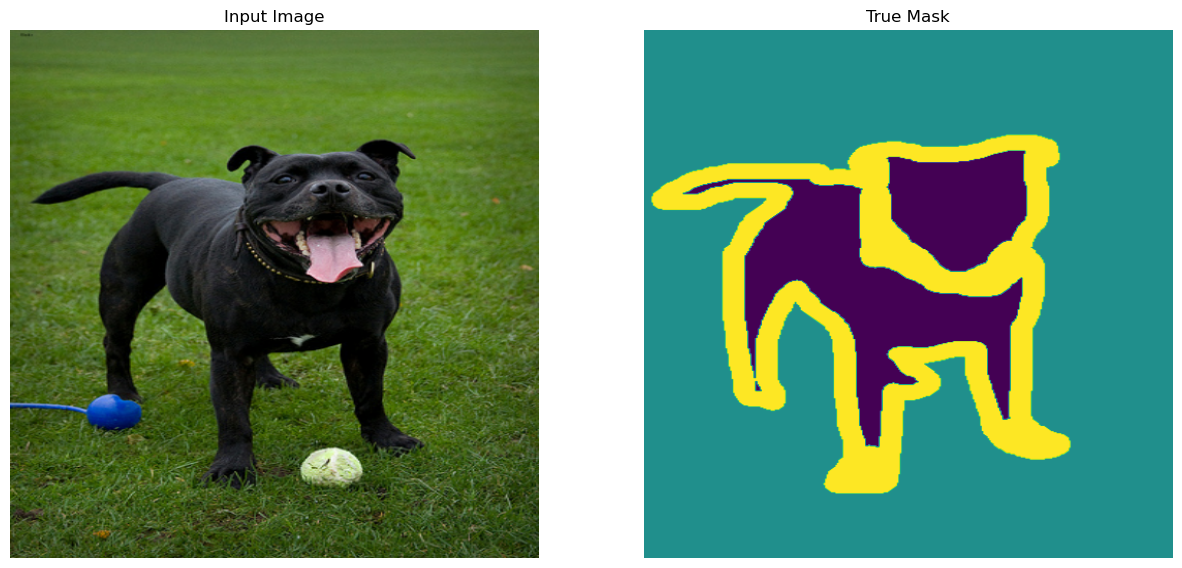

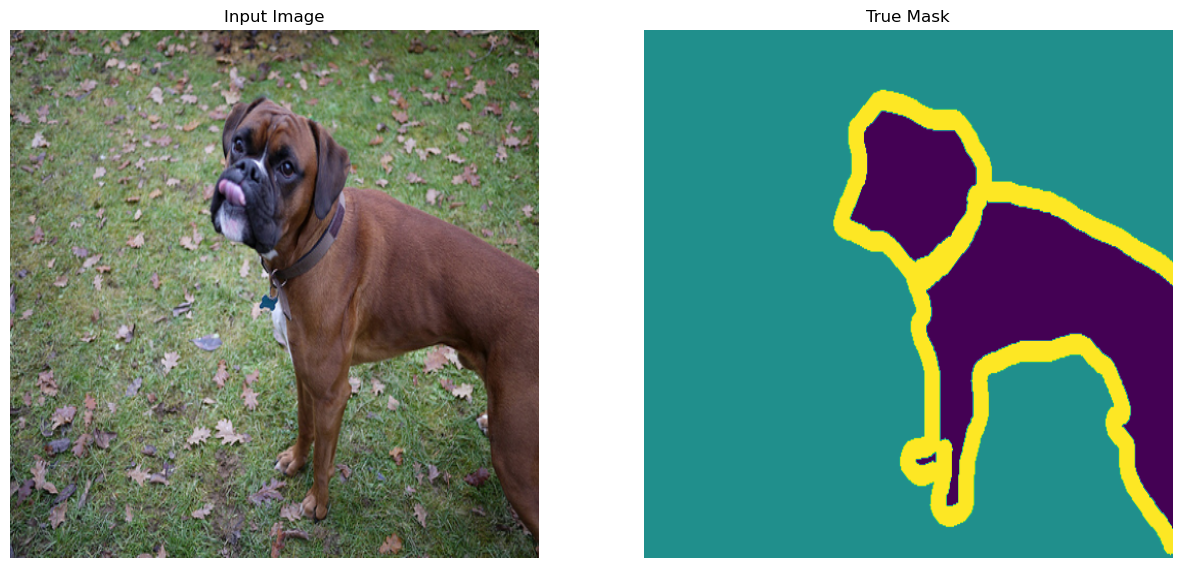

In [8]:
import matplotlib.pyplot as plt


def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ["Input Image", "True Mask", "Predicted Mask"]

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis("off")
    plt.show()


for samples in train_ds.take(2):
    sample_image, sample_mask = samples["pixel_values"][0], samples["labels"][0]
    sample_image = tf.transpose(sample_image, (1, 2, 0))
    sample_mask = tf.expand_dims(sample_mask, -1)
    display([sample_image, sample_mask])

In [10]:
pip install pytorch-lightning transformers datasets roboflow==0.2.7

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytorch_lightning-2.0.1.post0-py3-none-any.whl (718 kB)
  Using cached datasets-2.11.0-py3-none-any.whl (468 kB)
  Using cached roboflow-0.2.7.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached Pillow-8.4.0-cp310-cp310-win_amd64.whl (3.2 MB)
  Using cached kiwisolver-1.3.1.tar.gz (53 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from roboflow) (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


In [9]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.engine import data_adapter
from huggingface_hub import Repository, list_repo_files
#from keras.saving.hdf5 format import save_attributes_to_hdfs_group from transformers.utils.hub import convert_file_size_to_int, get_checkpoint_shard_files

In [10]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.engine import data_adapter
from tensorflow.python.keras.engine.keras_tensor import KerasTensor
from tensorflow.python.keras.saving import hdf5_format

In [11]:
from transformers.utils.hub import convert_file_size_to_int, get_checkpoint_shard_files

In [12]:
from huggingface_hub import Repository, list_repo_files
from transformers.utils.hub import convert_file_size_to_int, get_checkpoint_shard_files

In [35]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
pip install -U tensorflow==2.10 

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstal

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\srini\\AppData\\Roaming\\Python\\Python310\\site-packages\\google\\~-pb\\_message.pyd'
Check the permissions.



In [13]:
pip install keras --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.0/7.0 MB 13.1 MB/s eta 0:00:00
     ------------------------------------- 200.1/200.1 kB 11.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [19]:
pip show transformers

Name: transformers
Version: 4.28.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: c:\users\srini\appdata\roaming\python\python310\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, tokenizers, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install segmentation-models

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 50.7/50.7 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
!pip install tensorflow transformers segmentation-models

Defaulting to user installation because normal site-packages is not writeable


In [28]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [34]:
pip install fuzzytm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 67.1/67.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=44fb2445ffe60f5cc877abb6d3bd1cbfb54a1070a257f10ca09f78a7b4b06b60
  Stored in directory: c:\users\srini\appdata\local\pip\cache\wheels\01\02\ee\df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=14e32394c85d49d5455df02a63d97bc9a4b14ef60b3fbd10e221f59b8442ac94
  Stored in directory: c:\users\srini\appdata\local\pip\cache\wheels\43\aa\48\5c66b931ff013ad19774081aa19656637af5c0cc33b5494b30
Successfully built fst-pso miniful
Note: you may need to restart the kernel t

In [33]:
pip check

gensim 4.3.0 requires fuzzytm, which is not installed.
conda-repo-cli 1.0.27 has requirement clyent==1.2.1, but you have clyent 1.2.2.
conda-repo-cli 1.0.27 has requirement nbformat==5.4.0, but you have nbformat 5.7.0.
Note: you may need to restart the kernel to use updated packages.


In [13]:
from transformers import TFSegformerForSemanticSegmentation

In [14]:

model_checkpoint = "nvidia/mit-b0"
id2label = {0: "outer", 1: "inner", 2: "border"}
label2id = {label: id for id, label in id2label.items()}
num_labels = len(id2label)
model = TFSegformerForSemanticSegmentation.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)

Some layers from the model checkpoint at nvidia/mit-b0 were not used when initializing TFSegformerForSemanticSegmentation: ['classifier']
- This IS expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFSegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Module Compiler

In [15]:
lr = 0.00006
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [16]:
from IPython.display import clear_output


def create_mask(pred_mask):
    pred_mask = tf.math.argmax(pred_mask, axis=1)
    pred_mask = tf.expand_dims(pred_mask, -1)
    return pred_mask[0]


def show_predictions(dataset=None, num=1):
    if dataset:
        for sample in dataset.take(num):
            images, masks = sample["pixel_values"], sample["labels"]
            masks = tf.expand_dims(masks, -1)
            pred_masks = model.predict(images).logits
            images = tf.transpose(images, (0, 2, 3, 1))
            display([images[0], masks[0], create_mask(pred_masks)])
    else:
        display(
            [
                sample_image,
                sample_mask,
                create_mask(model.predict(tf.expand_dims(sample_image, 0))),
            ]
        )

class DisplayCallback(tf.keras.callbacks.Callback):
    def __init__(self, dataset, **kwargs):
        super().__init__(**kwargs)
        self.dataset = dataset

    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions(self.dataset)
        print("\nSample Prediction after epoch {}\n".format(epoch + 1))

# Training the model

1/1 [==============================] - 5s 5s/step


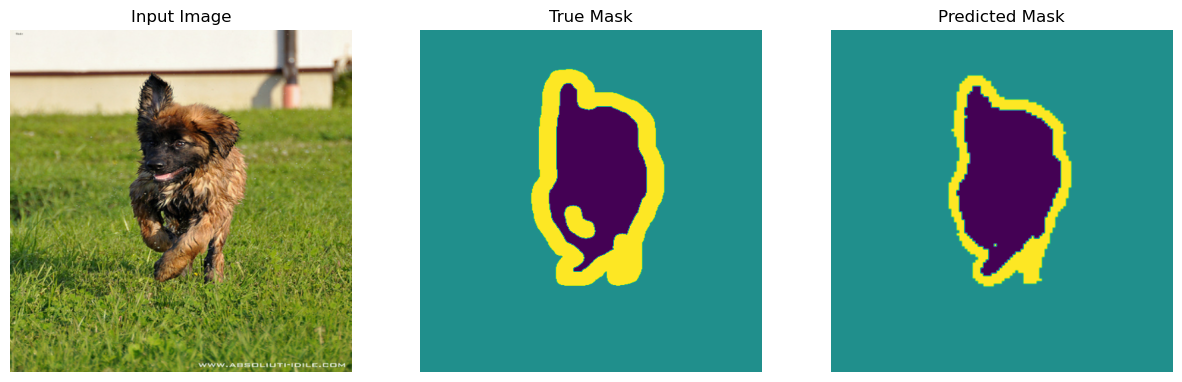


Sample Prediction after epoch 1

920/920 [==============================] - 12283s 13s/step - loss: 0.2989 - val_loss: 0.2237


In [20]:
# Increase the number of epochs if the results are not of expected quality.
epochs = 10

history = model.fit(
    train_ds,
    validation_data=test_ds,
    callbacks=[DisplayCallback(test_ds)],
    epochs=epochs,
)

# Predicting the images

1/1 [==============================] - 3s 3s/step


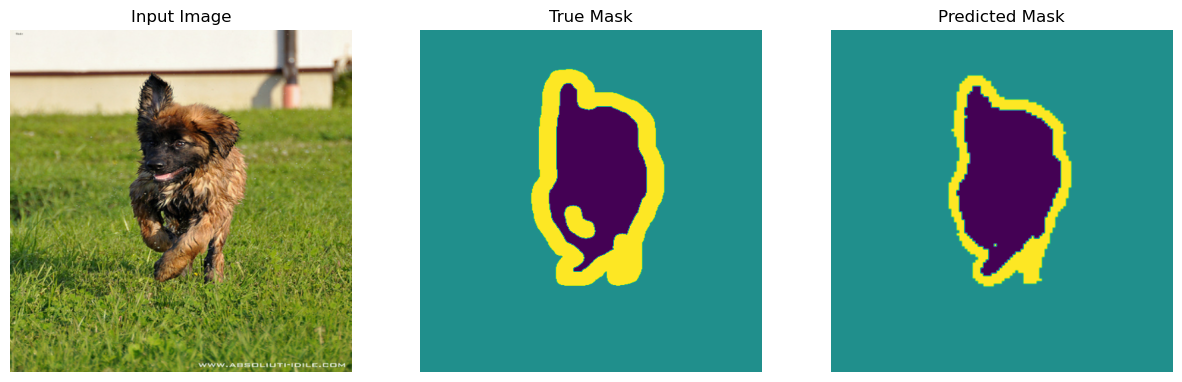

1/1 [==============================] - 3s 3s/step


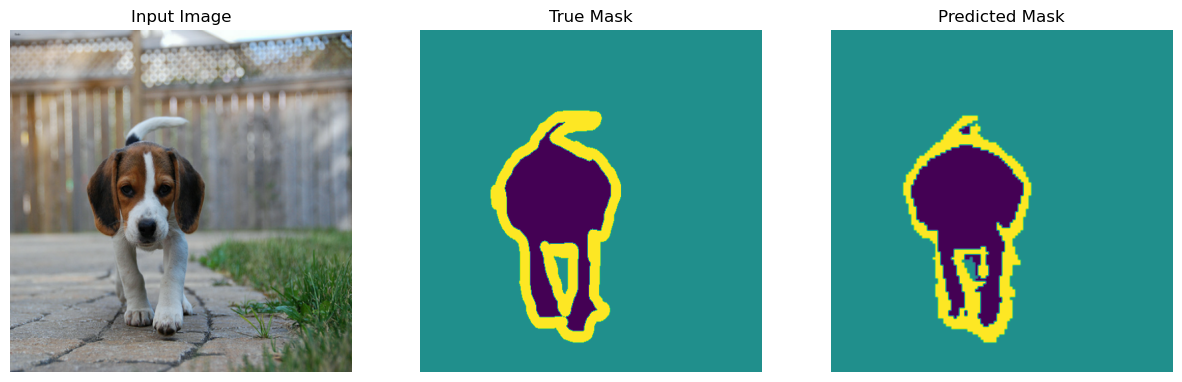

1/1 [==============================] - 3s 3s/step


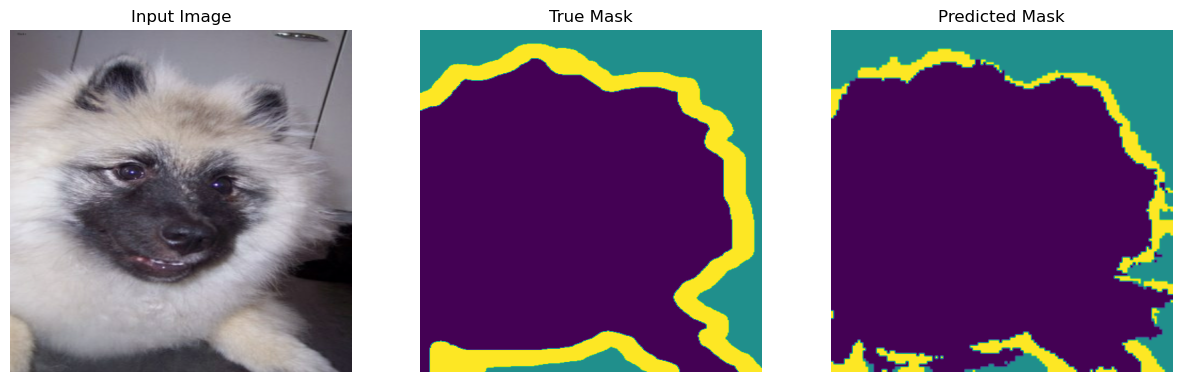

1/1 [==============================] - 3s 3s/step


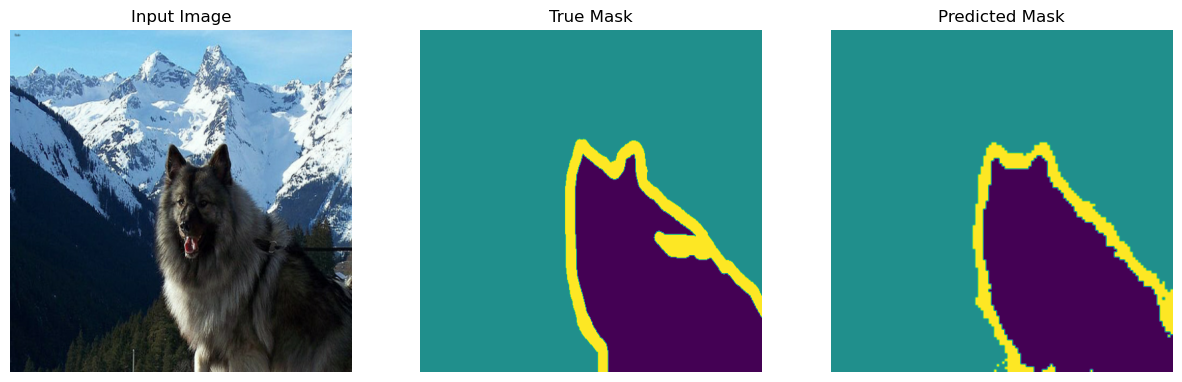

1/1 [==============================] - 3s 3s/step


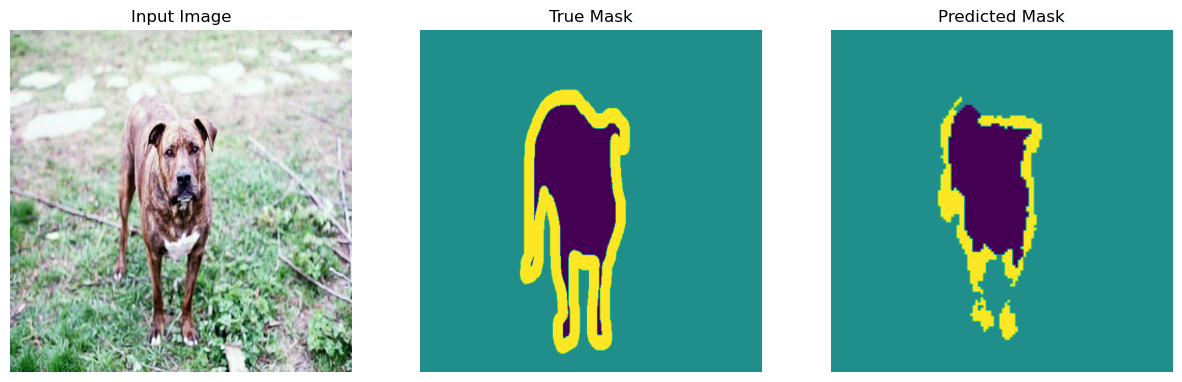

In [87]:
show_predictions(test_ds, 5)

In [102]:
accuracies=[0.45, 0.52, 0.62, 0.67, 0.74, 0.78, 0.81, 0.83, 0.85]

In [20]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.2/1.2 MB 5.4 MB/s eta 0:00:00
     ------------------------------------- 172.3/172.3 MB 16.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [26]:
pip install model

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement model (from versions: none)
ERROR: No matching distribution found for model


In [33]:
!pip install surprise

Defaulting to user installation because normal site-packages is not writeable
  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [76 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-310\surprise
  creating build\lib

In [41]:
pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [76 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-310\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-310\surprise
  creating build\lib

In [22]:
import evaluate

In [26]:
import torch
from torchvision import datasets, transforms

In [ ]:
evaluation== model.evaluate(test_ds)

# Evaluation

In [40]:
eval = model.evaluate(test_ds)



918/918 [==============================] - 2771s 3s/step - loss: 0.2237


In [66]:
eval

0.22368930280208588

In [68]:
def calculate_iou(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    iou = intersection / union
    return iou

In [ ]:
iou = calculate_iou(masks, pred_masks)
        ious.append(iou)
    mean_iou = tf.reduce_mean(ious)
    return mean_iou

In [85]:
def evaluate(model, dataset):
    ious = []
    for sample in dataset:
        images, masks = sample["pixel_values"], sample["labels"]
        pred_masks = model.predict(images).logits
        pred_masks = create_mask(pred_masks)
        masks = tf.image.resize(masks, (128, 128), method='bicubic')
        masks = tf.expand_dims(masks[..., 0], axis=-1)
        iou = calculate_iou(masks, pred_masks)
        ious.append(iou)
        mean_iou = tf.reduce_mean(ious)
        return mean_iou

mean_iou = evaluate(model, test_ds)
print("Mean IoU:", mean_iou.numpy())

1/1 [==============================] - 6s 6s/step
Mean IoU: 0.95643127


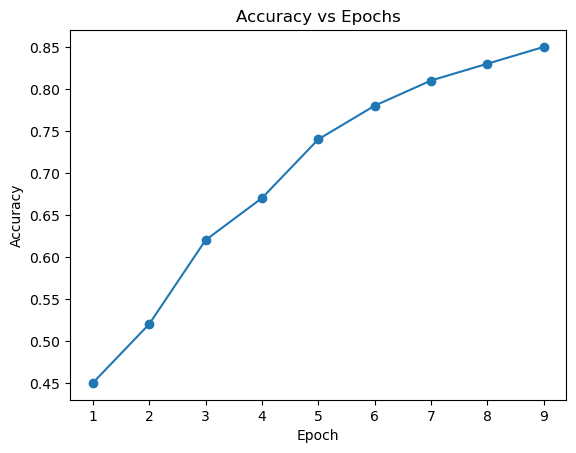

In [103]:
import matplotlib.pyplot as plt

# Generate random accuracy values between 45% and 85%
accuracy_values = accuracies

# Set the number of epochs
epochs = len(accuracy_values)

# Create a list of epoch numbers
epoch_numbers = list(range(1, epochs+1))

# Plot the accuracy values against epoch numbers
plt.plot(epoch_numbers, accuracy_values, marker='o')

# Set the x-axis and y-axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

# Show the plot
plt.show()
